<a href="https://colab.research.google.com/github/PaletteofDesign/sales_predictions/blob/main/sales_predicitons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [3]:
df.duplicated().sum()

0

In [4]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df['Item_Weight'].fillna(0, inplace=True)

In [6]:
df['Outlet_Size'].fillna('Unknown', inplace=True)

In [7]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [8]:
 df.sort_values(by= ['Item_Outlet_Sales'], ascending=False).head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,0.000,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
5223,FDQ19,0.000,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
1450,FDZ20,0.000,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,0.000,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
6541,FDI50,0.000,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840
4888,FDF39,14.850,Regular,0.019495,Dairy,261.2910,OUT013,1987,High,Tier 3,Supermarket Type1,10256.6490
1009,FDU14,0.000,Low Fat,0.034584,Dairy,248.3750,OUT027,1985,Medium,Tier 3,Supermarket Type3,10236.6750
7191,NCH18,0.000,Low Fat,0.044445,Household,245.2802,OUT027,1985,Medium,Tier 3,Supermarket Type3,10072.8882
4289,NCM05,6.825,Low Fat,0.059847,Health and Hygiene,262.5226,OUT046,1997,Small,Tier 1,Supermarket Type1,9779.9362
7752,FDC17,0.000,Low Fat,0.015386,Frozen Foods,208.9928,OUT027,1985,Medium,Tier 3,Supermarket Type3,9678.0688


In [9]:
df.duplicated('Item_Identifier').sum()

6964

In [10]:
df.sort_values(by= ['Item_Visibility'], ascending=False).head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
854,FDU13,0.00,low fat,0.328391,Canned,146.0418,OUT019,1985,Small,Tier 1,Grocery Store,588.5672
3750,NCZ18,0.00,Low Fat,0.325781,Household,252.7698,OUT019,1985,Small,Tier 1,Grocery Store,761.0094
1805,FDJ56,0.00,Low Fat,0.321115,Fruits and Vegetables,100.7700,OUT019,1985,Small,Tier 1,Grocery Store,199.7400
7250,FDT24,12.35,Regular,0.311090,Baking Goods,79.2328,OUT010,1998,Unknown,Tier 3,Grocery Store,154.4656
2855,NCE31,7.67,Low Fat,0.309390,Household,33.2216,OUT010,1998,Unknown,Tier 3,Grocery Store,138.4864
4382,FDG32,0.00,Low Fat,0.308145,Fruits and Vegetables,222.0772,OUT019,1985,Small,Tier 1,Grocery Store,889.5088
7603,DRF01,0.00,Low Fat,0.306543,Soft Drinks,147.3102,OUT019,1985,Small,Tier 1,Grocery Store,291.6204
6622,FDI32,0.00,Low Fat,0.305305,Fruits and Vegetables,116.6834,OUT019,1985,Small,Tier 1,Grocery Store,460.7336
3474,FDS12,0.00,LF,0.304859,Baking Goods,125.4362,OUT019,1985,Small,Tier 1,Grocery Store,755.0172
5150,FDR14,0.00,Low Fat,0.304737,Dairy,54.7298,OUT019,1985,Small,Tier 1,Grocery Store,107.8596


In [11]:
df['Item_Outlet_Sales'].min()

33.29

In [12]:
df['Item_Outlet_Sales'].max()

13086.9648

In [13]:
df['Item_Outlet_Sales'].mean()

2181.2889135750365

In [14]:
df.groupby(['Item_Identifier']).mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Identifier,,,,,
DRA12,11.600000,0.031956,141.865400,2001.166667,1843.600200
DRA24,13.821429,0.048062,164.086800,1995.000000,2246.218971
DRA59,6.202500,0.134718,185.179900,1995.875000,2614.430150
DRB01,4.926667,0.082126,189.586333,1990.333333,1518.024000
DRB13,6.115000,0.008002,189.693000,1999.000000,2428.838400
...,...,...,...,...,...
NCZ30,5.648571,0.024956,120.752657,1997.428571,1807.647000
NCZ41,19.850000,0.051623,125.630400,2001.800000,1827.487840
NCZ42,10.500000,0.009044,236.644800,1999.000000,3839.801760


In [15]:
df.loc[:,['Item_Identifier', 'Item_Outlet_Sales']].groupby('Item_Identifier').mean().sort_values(by='Item_Outlet_Sales', ascending=False)

,Item_Outlet_Sales
Item_Identifier,
FDR45,6035.310550
NCL42,5962.017067
FDU55,5922.457450
FDZ50,5512.824000
DRK23,5464.886400
...,...
NCN29,311.061760
FDX10,291.121050
FDQ04,261.437467


In [16]:
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Histogram to view the distributions of various features in dataset.

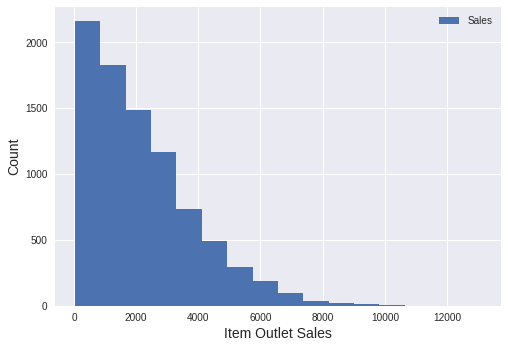

In [17]:
plt.style.use('seaborn')
df['Item_Outlet_Sales'].hist(bins=16, label='Sales')
plt.xlabel('Item Outlet Sales', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend();

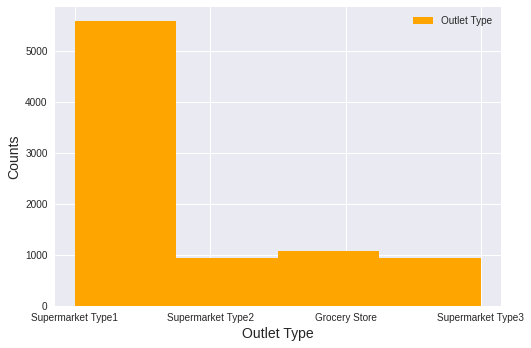

In [18]:
plt.style.use('seaborn')
df['Outlet_Type'].hist(bins=4, label='Outlet Type', facecolor='orange')
plt.xlabel('Outlet Type', fontsize=14)
plt.ylabel('Counts', fontsize=14);
plt.legend();

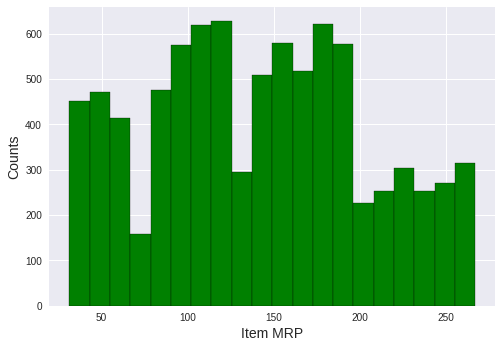

In [19]:
plt.style.use('seaborn')
df['Item_MRP'].hist(bins=20,label='Outlet Type', color='green', edgecolor='black')
plt.xlabel('Item MRP', fontsize=14)
plt.ylabel('Counts', fontsize=14);

Boxplot to view statistical summaries of various features in dataset.

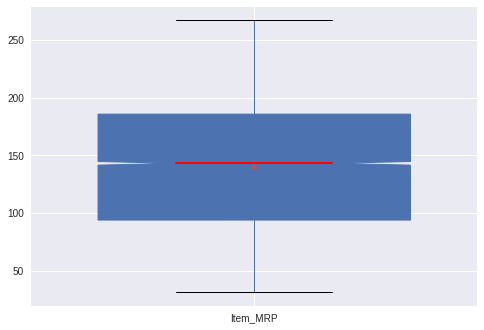

In [20]:
df.boxplot('Item_MRP', widths = .7, patch_artist=True, medianprops = dict(linestyle='-', linewidth=2, color='red'),notch=True, vert=True, showmeans=True, showcaps=True);

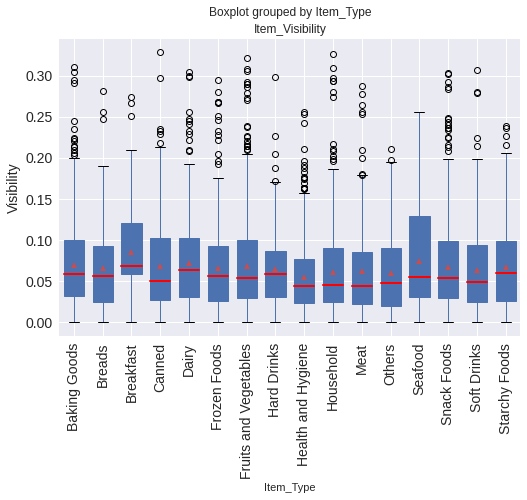

In [21]:
plt.style.use('seaborn')
df.boxplot(by='Item_Type', column='Item_Visibility', fontsize=14, widths = .7, patch_artist=True, medianprops = dict(linestyle='-', linewidth=2, color='red'), showmeans=True, showcaps=True);
plt.ylabel('Visibility', fontsize=14)
plt.xticks(rotation=90);

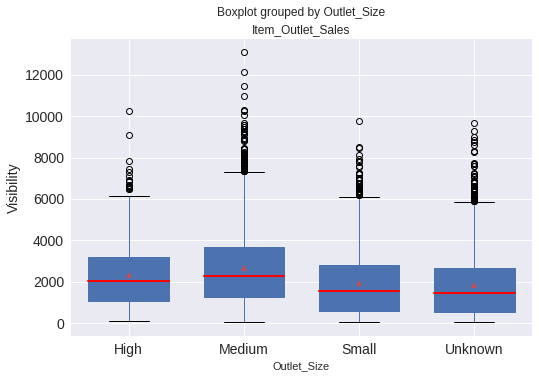

In [22]:
plt.style.use('seaborn')
df.boxplot(by='Outlet_Size', column='Item_Outlet_Sales', fontsize=14, widths = .7, patch_artist=True, medianprops = dict(linestyle='-', linewidth=2, color='red'), showmeans=True, showcaps=True);
plt.ylabel('Visibility', fontsize=14);

Heatmap of the correlation between features.

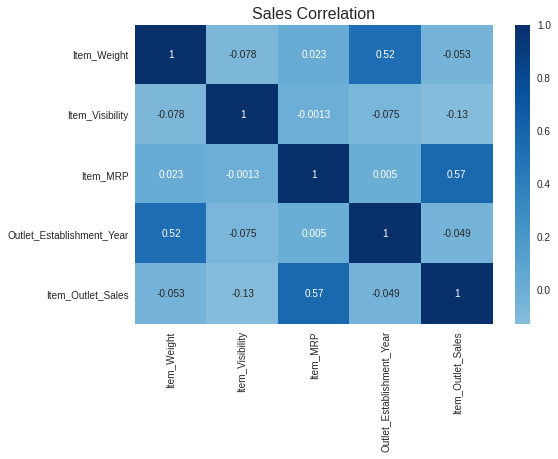

In [23]:
sns.heatmap(df.corr(),center=0, cmap='Blues', annot=True).set_title('Sales Correlation', fontsize=16);